<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [32]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

%matplotlib inline 
import scipy as sc
import sklearn 
import sklearn.datasets
import sklearn.tree
import sklearn.linear_model
import sklearn.cross_validation

import pprint

## 1. Load the data from file

---

In [33]:
cd iowa_liquor/


[Errno 2] No such file or directory: 'iowa_liquor/'
/Users/bua/ECON628-01/datasets/iowa_liquor


In [34]:
data = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [36]:
data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [37]:
data.shape

(270955, 18)


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [38]:
# convert object type in column 'Date' to datetime using special format %m/%d/%Y
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

### 3.2 Clean the columns

In [39]:
# Convert string to int 
data['State Bottle Retail'] = data['State Bottle Retail'].apply(lambda x: float(x[1:]))
data['State Bottle Cost'] = data['State Bottle Cost'].apply(lambda x: float(x[1:]))
data['Sale (Dollars)'] = data['Sale (Dollars)'].apply(lambda x: float(x[1:]))



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [40]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [41]:
date = data['Date']
store_number = data['Store Number']

In [42]:
# filter data to find the number of stores working days in 2015
store_work_days = {}
for i, value in enumerate(date):
    if value.year == 2015:
        if store_number[i] in store_work_days:
            if value not in store_work_days[store_number[i]]:
                store_work_days[store_number[i]][value] = 1
            else:
                store_work_days[store_number[i]][value] = store_work_days[store_number[i]][value] + 1
        else:
            store_work_days[store_number[i]] = {}

In [70]:
pprint.pprint(list(store_work_days[2560].items()))

[(Timestamp('2015-05-11 00:00:00'), 15),
 (Timestamp('2015-05-18 00:00:00'), 14),
 (Timestamp('2015-08-10 00:00:00'), 19),
 (Timestamp('2015-12-07 00:00:00'), 18),
 (Timestamp('2015-02-23 00:00:00'), 14),
 (Timestamp('2015-06-26 00:00:00'), 18),
 (Timestamp('2015-03-23 00:00:00'), 13),
 (Timestamp('2015-11-09 00:00:00'), 15),
 (Timestamp('2015-04-06 00:00:00'), 18),
 (Timestamp('2015-12-18 00:00:00'), 29),
 (Timestamp('2015-07-06 00:00:00'), 10),
 (Timestamp('2015-08-03 00:00:00'), 24),
 (Timestamp('2015-09-21 00:00:00'), 22),
 (Timestamp('2015-07-13 00:00:00'), 16),
 (Timestamp('2015-11-16 00:00:00'), 11),
 (Timestamp('2015-06-22 00:00:00'), 19),
 (Timestamp('2015-06-15 00:00:00'), 14),
 (Timestamp('2015-08-31 00:00:00'), 29),
 (Timestamp('2015-04-27 00:00:00'), 8),
 (Timestamp('2015-03-30 00:00:00'), 12),
 (Timestamp('2015-02-16 00:00:00'), 18),
 (Timestamp('2015-07-27 00:00:00'), 16),
 (Timestamp('2015-11-30 00:00:00'), 17),
 (Timestamp('2015-11-20 00:00:00'), 15),
 (Timestamp('2015

In [71]:
# filter store_work_days to figure out which store worked less as expected
bad_stores = {}
for i, k_v in enumerate(store_work_days.items()):
    key, value = k_v
    if len(value.keys()) < 365:
        bad_stores[key] = value

In [72]:
test = bad_stores[4097] 

In [73]:
keys, values = list(test.keys()), list(test.values())

(array([ 735630.,  735658.,  735689.,  735719.,  735750.,  735780.,
         735811.,  735842.,  735872.,  735903.,  735933.]),
 <a list of 11 Text xticklabel objects>)

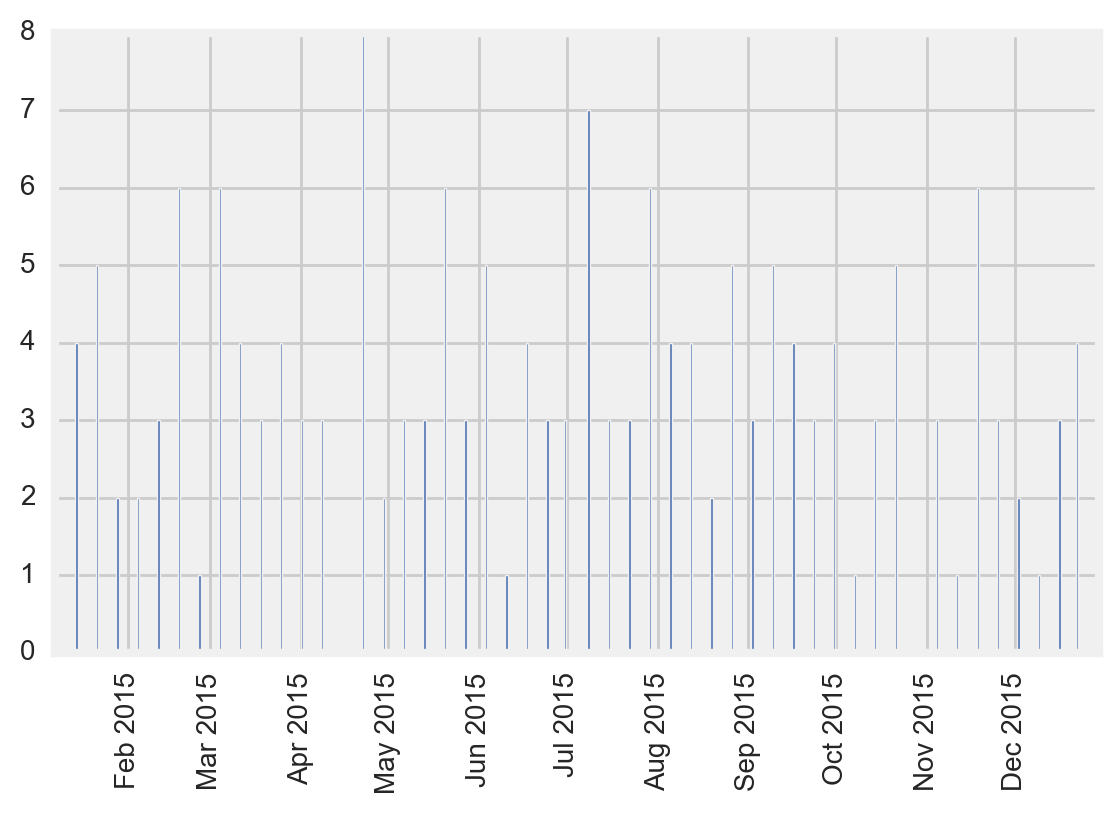

In [74]:
plt.bar(keys, values)
plt.xticks(rotation='vertical')

This part shows how often a particular store is working in 2015.
First go through every store, and figure out the duplicates of dates. Let's supposed that it's how many hours per day.
Secondly, we filter it comparing with 365 (total amount of the days in the year)


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [48]:
date = data['Date']
bottle_volume = data['Bottle Volume (ml)']
state_bottle_cost = data['State Bottle Cost']
state_bottle_retail = data['State Bottle Retail']
bottles_sold = data['Bottles Sold']
sale = data['Sale (Dollars)'] 
counties = data['County']
volume_sold_gallons = data['Volume Sold (Gallons)']
store_number = data['Store Number']

In [49]:
# calculate the total amount of retail for every store
store_bottle_sold = {}
for store, bottles, cost, d in zip(store_number, bottles_sold, state_bottle_retail, date):
    if d.year == 2015:
        if store in state_bottle_retail:
            store_bottle_sold[store] = state_bottle_retail[store] + bottles * cost
        else:
            store_bottle_sold[store] = bottles * cost

In [50]:
print(store_bottle_sold[4470])

78.75


In [51]:
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


### 5.2 Calculate the profit each store is making in 2015.


In [52]:
# calculate the profit 
profit_each_store = {}
for store, bottles, cost_retail, total, d in zip(store_number, bottles_sold, state_bottle_cost, sale, date):
    if d.year == 2015:
        if store in profit_each_store:
            profit_each_store[store] = profit_each_store[store] + total - (cost_retail * bottles)
        else:
            profit_each_store[store] = total - (cost_retail * bottles)

In [53]:
#print(sorted(list(np.unique(profit_each_store))))

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [54]:
# find the counties with the biggest profit
top_countries={}
for d, store, county, volume, retail, real in zip(date, store_number, counties, volume_sold_gallons, state_bottle_retail, state_bottle_cost):
    if d.year == 2015:
        if county in top_countries:
            top_countries[county] = top_countries[county] + ((retail - real) / volume)
        else:
            top_countries[county] = 1

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

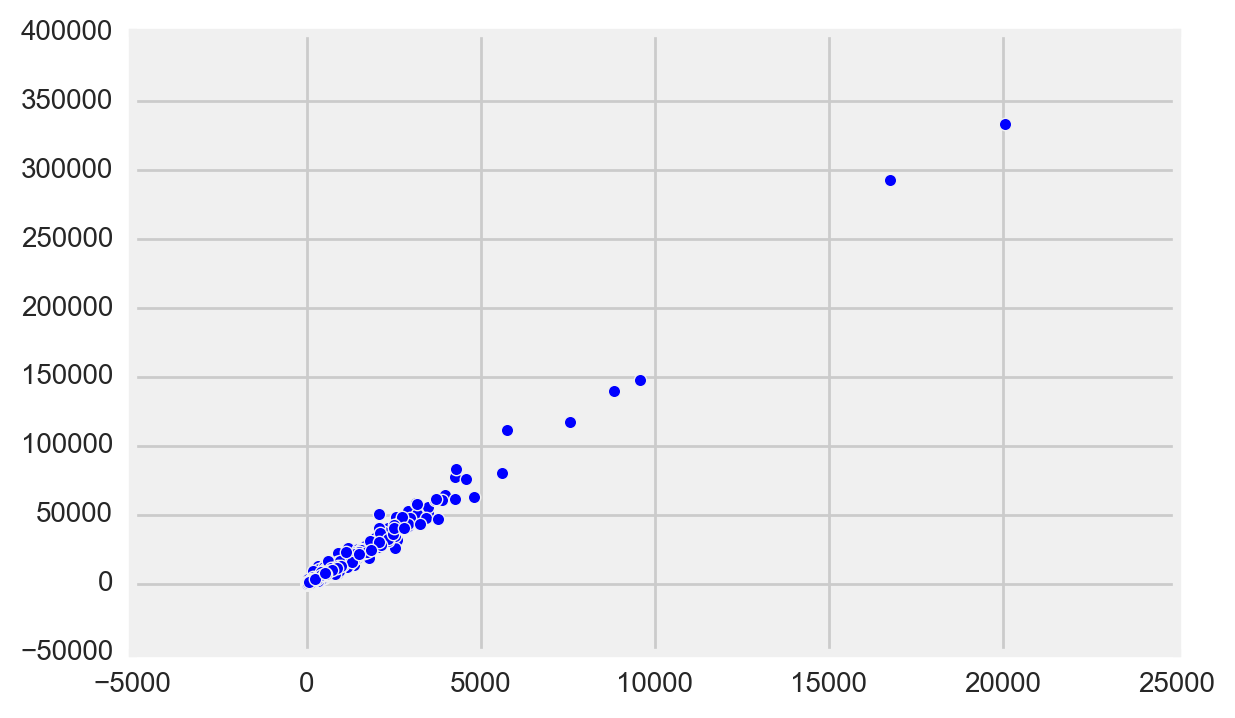

In [55]:
# As we see on the graph, there is a linear dependency between profit and store size.
ratio = {}
for i in profit_each_store.keys():
    size = sum(data[data['Store Number'] == i]['Volume Sold (Gallons)'])
    ratio[size] = profit_each_store[i]

size = list(ratio.keys())
profit = list(ratio.values())
plt.scatter(size, profit)

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [56]:
def return_liquor_type(x):
    try:
        if 'VODKA' in x:
            return 'Vodka'
        elif 'WHISK' in x:
            return 'Whiskey'
        elif 'SCHNAPPS' in x:
            return 'Schnapps'
        elif 'RUM' in x:
            return 'Rum'
        elif 'BRAND' in x:
            return 'Brandy'
        else:
            return 'Other'
    except:
        pass

        
data['Liquor Types'] = data['Category Name'].apply(return_liquor_type)
data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Liquor Types
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,Brandy
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,Whiskey
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,Whiskey
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,Other
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,Vodka


### 5.6 Do relationships exist between the broader liquor type and profit?

In [57]:
#This section ranks the type of alcohol and its associated profit

data['Profit'] = ((data['State Bottle Retail'] - data['State Bottle Cost']))

profitbycategory = pd.pivot_table(data, values='Profit', columns=['Liquor Types'], aggfunc=np.sum)
categoryprof_df = pd.DataFrame(profitbycategory)
categoryprof_df.head().reset_index().sort_values('Profit', ascending=False)

,Liquor Types,Profit
1,Other,321431.38
4,Vodka,281532.76
2,Rum,144844.73
0,Brandy,62151.43
3,Schnapps,54399.45



### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [58]:
data['broad_type'] = data['Category Name'].map(return_liquor_type)
data['profit_dollars'] = data['Sale (Dollars)'] - (data['State Bottle Cost'] * data['Bottles Sold'])

liquor_type = data.groupby(['broad_type'])[['State Bottle Cost','State Bottle Retail','Bottles Sold','profit_dollars']].sum().reset_index()
liquor_type.sort_values('profit_dollars', ascending=False)

,broad_type,State Bottle Cost,State Bottle Retail,Bottles Sold,profit_dollars
5,Whiskey,915523.33,1374965.29,818055,4.139254e+06
4,Vodka,560949.65,842482.41,800136,2.794845e+06
1,Other,640817.90,962249.28,460653,2.265508e+06
2,Rum,288952.90,433797.63,330118,1.525286e+06
0,Brandy,124045.09,186196.52,149471,4.877834e+05
3,Schnapps,108734.59,163134.04,109821,4.234070e+05


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

#### The new tax should depends on profit of each store, from observation of profit/size ratio there are linear dependence between this variables. The bigger the store the more liquor it sales. If taxes depends on amount of profit it would affect more on larger stores and less on small ones.



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [59]:
# find first quartile (January, February, March) for 2015 and 2016 
# find the areas that gained the most money
Q1_2015_sales = {}
Q1_2016_sales = {}
Q1_2016_areas = {}
for d, s, county in zip(date, sale, counties):
    if d.year == 2015:
        if (d.month == 1) or (d.month == 2) or (d.month == 3): 
            if d.month in Q1_2015_sales:
                temp = Q1_2015_sales[d.month] + s 
                Q1_2015_sales[d.month] = temp
            else:
                Q1_2015_sales[d.month] = s
        if county in Q1_2016_areas:
            Q1_2016_areas[county] = max(Q1_2016_areas[county], s)
        else:
            Q1_2016_areas[county] = s
    else:
        if (d.month == 1) or (d.month == 2) or (d.month == 3):
            if d.month in Q1_2016_sales:
                temp = Q1_2016_sales[d.month] + s 
                Q1_2016_sales[d.month] = temp
            else:
                Q1_2016_sales[d.month] = s
        if county in Q1_2016_areas:
            Q1_2016_areas[county] = max(Q1_2016_areas[county], s)
        else:
            Q1_2016_areas[county] = s

In [60]:
temp = list(Q1_2016_areas.items())
temp.sort(key=lambda x: x[1])
top_5_areas = temp[::-1][:5]
pprint.pprint(Q1_2015_sales)
pprint.pprint(Q1_2016_sales)
pprint.pprint(top_5_areas)

{1: 1858000.6299999827, 2: 2037903.479999979, 3: 2257891.7799999774}
{1: 1880583.5299999849, 2: 2214465.0099999658, 3: 2304449.0199999735}
[('Polk', 36392.400000000001),
 ('Dallas', 32184.0),
 ('Johnson', 29327.759999999998),
 ('Crawford', 17378.52),
 ('Henry', 17378.52)]


In [61]:
# collect name of the area and its total profit
areas = []
total = []
for area in top_5_areas:
    areas.append(area[0])
    total.append(area[1])

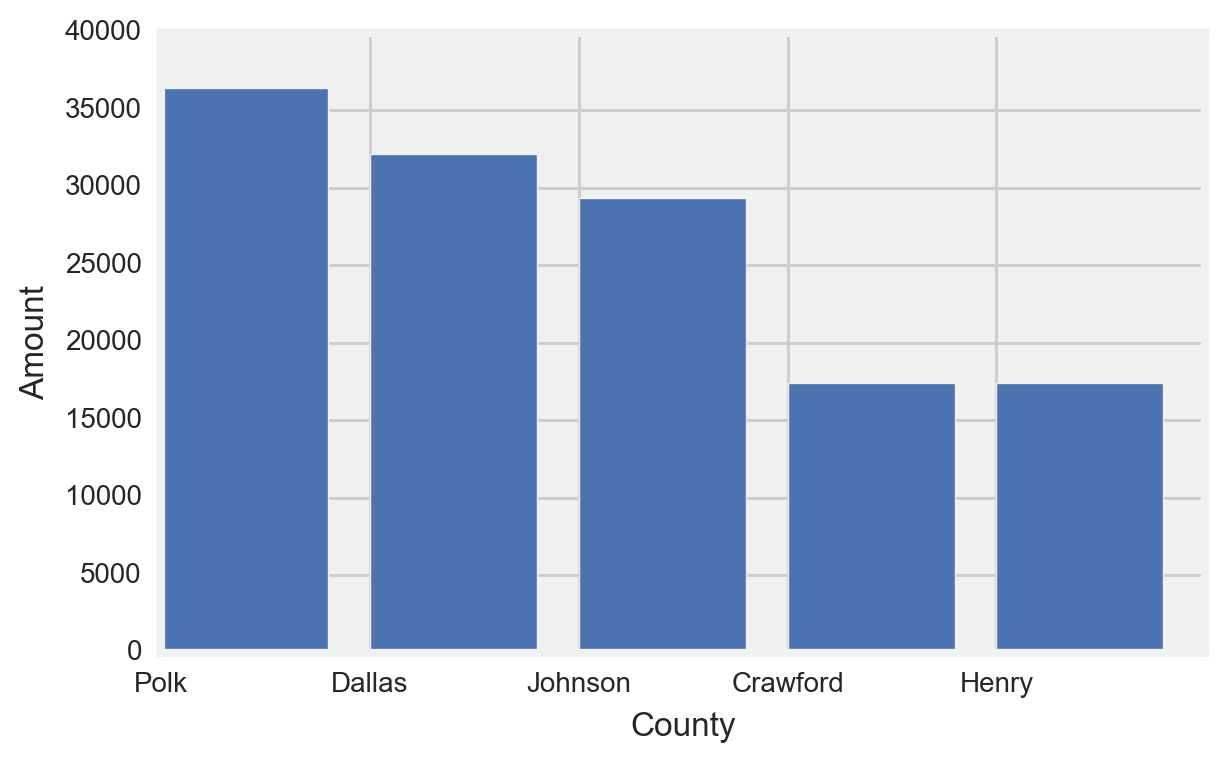

In [62]:
# output of the plot bar that represents counties and amount of profit
plt.bar([1, 2, 3, 4, 5], total)
plt.xticks([1, 2, 3, 4, 5], areas)
plt.xlabel('County')
plt.ylabel('Amount')

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [63]:
# find out the most successfull counties that cope with huge volume
Q1_most_success = {}
for d, volume, county in zip(date, volume_sold_gallons, counties):
    if d.year == 2015:
        if county in Q1_most_success:
            Q1_most_success[county] = Q1_most_success[county] + volume
        else:
            Q1_most_success[county] = volume

In [64]:
# sort and convert
temp = list(Q1_most_success.items())
temp.sort(key=lambda x: x[1])
top_5_volumes = temp[::-1][:5]
top_5_volumes = dict(top_5_volumes)
top_5_areas = dict(top_5_areas)

In [65]:
# union top counties with huge volume and top counties with huge profit
the_most_successfull_areas = []
for key, value in top_5_areas.items():
    if key in top_5_volumes:
        the_most_successfull_areas.append(key)
the_most_successfull_areas

['Polk', 'Johnson']

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [85]:
print('The most successful areas are : ', ', '.join(the_most_successfull_areas))

('The most successful areas are : ', 'Polk, Johnson')


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [67]:
# count the most common type of liquor for each county
type_liquor = {}
liq_types = data['Liquor Types']
for area in the_most_successfull_areas:
    for d, liq_types, county in zip(date, liq_types, counties):
        if d.year == 2015:
            if area == county:
                if area in type_liquor:
                    if liq_types in type_liquor[area]:
                        type_liquor[area][liq_types] = type_liquor[area][liq_types] + 1
                    else:
                        type_liquor[area][liq_types] = 1
                else:
                    type_liquor[area] = {}     

In [86]:
# sort by second value, to see the most common alcohol
type_liquor
for county in type_liquor:
    temp = list(type_liquor[county].items())
    temp.sort(key=lambda x: x[1])
    print('The best alcohol for this county -> {} is {}.'.format(county, temp[::-1][0][0]))

The best alcohol for this county -> Polk is Vodka.
